### Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

Importing Data set

In [2]:
getdata=pd.read_csv('E:\excelr\gold-pred\GOLD_PREDICATION\MCX_GOLD1!.csv')
getdata.head()

,time,open,high,low,close,Resistance Zone - 1 - High,Resistance Zone - 1 - Low,Support Zone - 1 - High,Support Zone - 1 - Low,Supply Demand - 1 - High,...,Plot,Plot.1,Plot.2,Plot.3,Plot.4,Plot.5,Plot.6,Plot.7,Plot.8,Plot.9
0,2016-01-21,26361,26507,26151,26190,NaN,NaN,NaN,NaN,NaN,...,5,10,15,20,25,30,35,40,45,50
1,2016-01-22,26281,26282,26100,26160,NaN,NaN,NaN,NaN,NaN,...,5,10,15,20,25,30,35,40,45,50
2,2016-01-25,26247,26442,26206,26387,NaN,NaN,NaN,NaN,NaN,...,5,10,15,20,25,30,35,40,45,50
3,2016-01-27,26450,26809,26450,26749,NaN,NaN,NaN,NaN,NaN,...,5,10,15,20,25,30,35,40,45,50
4,2016-01-28,26844,26867,26600,26710,NaN,NaN,NaN,NaN,NaN,...,5,10,15,20,25,30,35,40,45,50


In [3]:

df= getdata.iloc[:, [0,4]]


In [4]:
# change name of Colunm

df= df.rename(columns={'close':'price','time':'date'})
df.head()

,date,price
0,2016-01-21,26190
1,2016-01-22,26160
2,2016-01-25,26387
3,2016-01-27,26749
4,2016-01-28,26710


In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
start_date = '2021-01-01'
end_date = '2024-01-01'
data = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
data.head()


,date,price
1269,2021-01-01,50244
1270,2021-01-04,51424
1271,2021-01-05,51720
1272,2021-01-06,50509
1273,2021-01-07,50904


In [7]:
# data['price'] = data['price'] / 10

In [8]:
data=pd.DataFrame(data)
data.head(-10)

,date,price
1269,2021-01-01,50244
1270,2021-01-04,51424
1271,2021-01-05,51720
1272,2021-01-06,50509
1273,2021-01-07,50904
...,...,...
2027,2023-12-11,61117
2028,2023-12-12,61181
2029,2023-12-13,61199
2030,2023-12-14,62454


In [9]:
data.shape

(773, 2)

### Checking for null values

In [10]:
data.isnull().sum()

date     0
price    0
dtype: int64

In [11]:
data.describe()

,date,price
count,773,773.000000
mean,2022-07-02 05:05:30.659767040,52542.928849
min,2021-01-01 00:00:00,44218.000000
25%,2021-10-01 00:00:00,47951.000000
50%,2022-07-01 00:00:00,50907.000000
75%,2023-03-31 00:00:00,58014.000000
max,2024-01-01 00:00:00,63678.000000
std,NaN,5157.327810


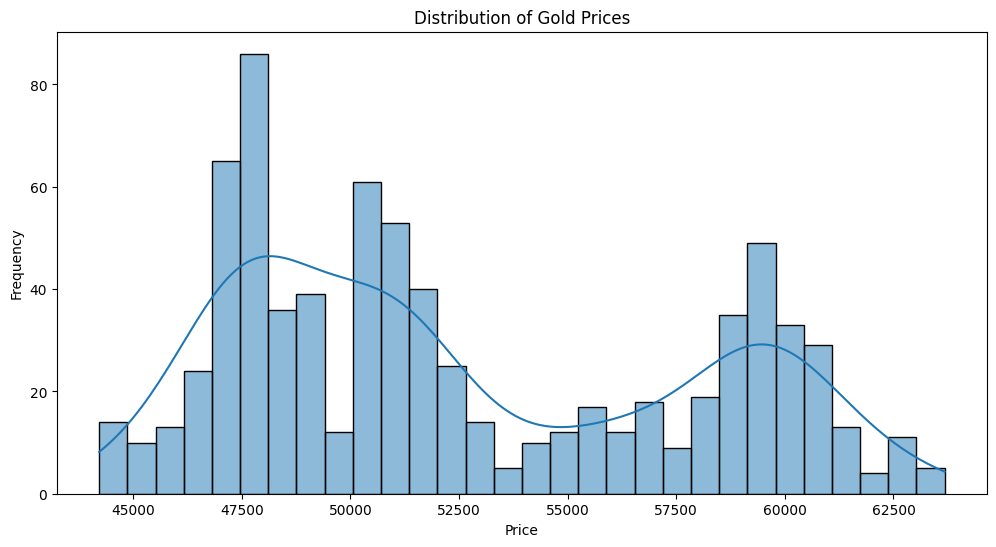

In [12]:
# Histogram of gold prices
plt.figure(figsize=(12, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Gold Prices')
plt.show()

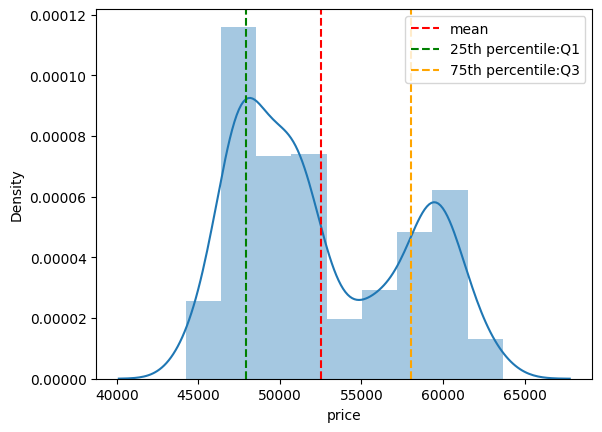

In [13]:
# Check for normality in data

sns.distplot(data['price'])
plt.axvline(x=np.mean(data['price']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(data['price'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(data['price'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

<Axes: >

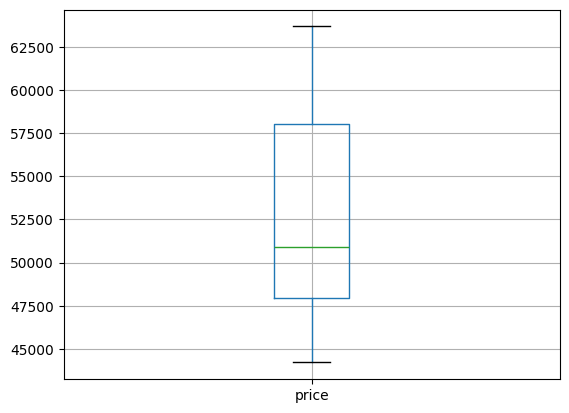

In [14]:
# CHECK OUTLAYERS

data.boxplot(column=["price"])

This code creates a boxplot of the Price column in the data dataframe using the data.boxplot() method from pandas. A boxplot is a standardized way of displaying the distribution of data based on five summary statistics: the minimum, the maximum, the median, and the 25th and 75th percentiles. there are no outlayer in data

# **Visualization of data**

In [15]:
# Check Trend Data

In [16]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(x=data['date'],y=data['price'], mode='lines'))
fig.show()

The plot displays the trend in gold prices over time 

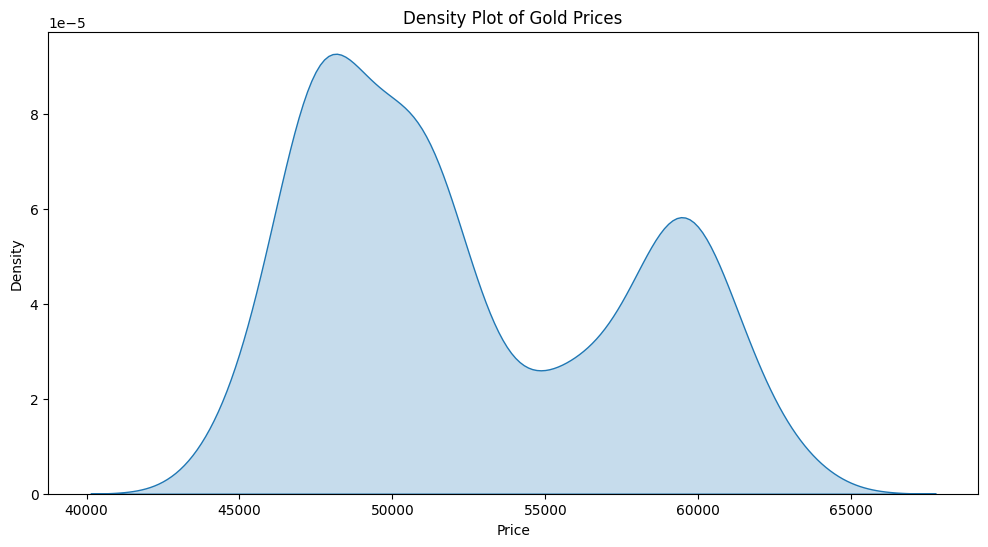

In [17]:
# Density plot of gold prices
plt.figure(figsize=(12, 6))
sns.kdeplot(data['price'], shade=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Density Plot of Gold Prices')
plt.show()

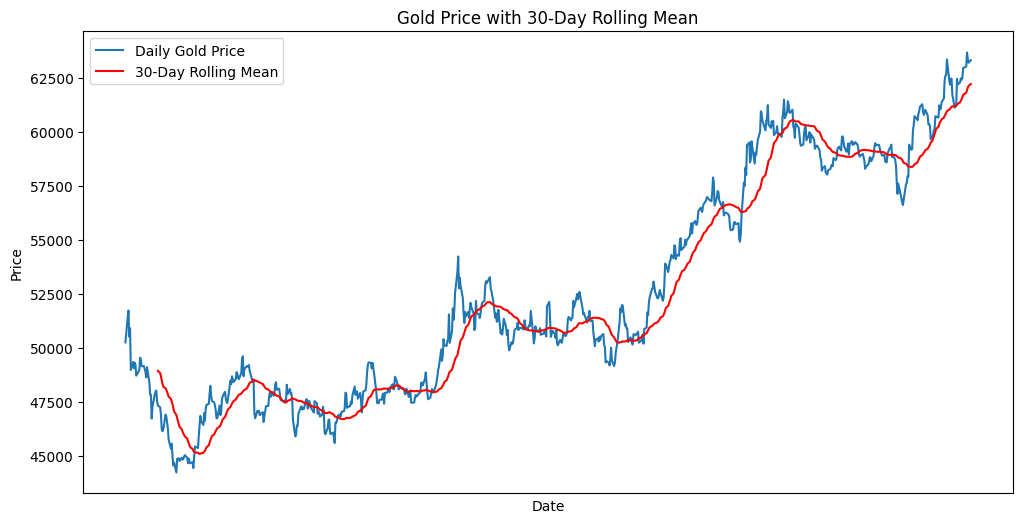

In [18]:
# Time series plot with a rolling mean

plt.figure(figsize=(12, 6))
data['rolling_mean'] = data['price'].rolling(window=30).mean()
plt.plot(data['date'], data['price'], label='Daily Gold Price')
plt.plot(data['date'], data['rolling_mean'], label='30-Day Rolling Mean', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Price with 30-Day Rolling Mean')
plt.legend()
plt.xticks([])
plt.show()

In [19]:
# Split Date into Year , Months and days
data = data.drop('rolling_mean', axis=1)
data['day'] = pd.to_datetime(data['date']).dt.day
data['month'] = pd.to_datetime(data['date']).dt.strftime('%b')
data['year'] = pd.to_datetime(data['date']).dt.year
data['date'] = pd.to_datetime(data['date'])
data['weekday'] = data['date'].dt.weekday
data['weekday'] = np.where(data.weekday == 0, 7, data.weekday)
data.head()

,date,price,day,month,year,weekday
1269,2021-01-01,50244,1,Jan,2021,4
1270,2021-01-04,51424,4,Jan,2021,7
1271,2021-01-05,51720,5,Jan,2021,1
1272,2021-01-06,50509,6,Jan,2021,2
1273,2021-01-07,50904,7,Jan,2021,3


[Text(0.5, 1.0, 'monthly Gold Price')]

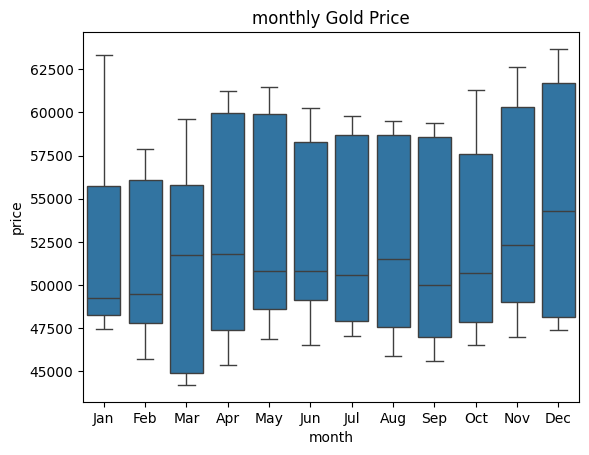

In [20]:
plot = sns.boxplot(x='month', y='price', data=data)
plot.set(title='monthly Gold Price')

In [21]:
df1 = data
df1=df1.sort_values(by='date', ascending=True)
df1=df1.set_index('date')
df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]
df1

,price,day,month,year,weekday
date,,,,,
2021-01-01,50244,1,Jan,2021,4
2021-01-04,51424,4,Jan,2021,7
2021-01-05,51720,5,Jan,2021,1
2021-01-06,50509,6,Jan,2021,2
2021-01-07,50904,7,Jan,2021,3
...,...,...,...,...,...
2023-12-26,63025,26,Dec,2023,1
2023-12-27,63678,27,Dec,2023,2
2023-12-28,63389,28,Dec,2023,3


This code performs seasonal decomposition on the Price column in the data dataframe using the seasonal_decompose() function from the statsmodels library. The resulting plot shows the original time series, the seasonal component, the trend component, and the residual component. 
We will use the above Times Series Decomposition Plot to determine the additive or multiplicative property of the there components.

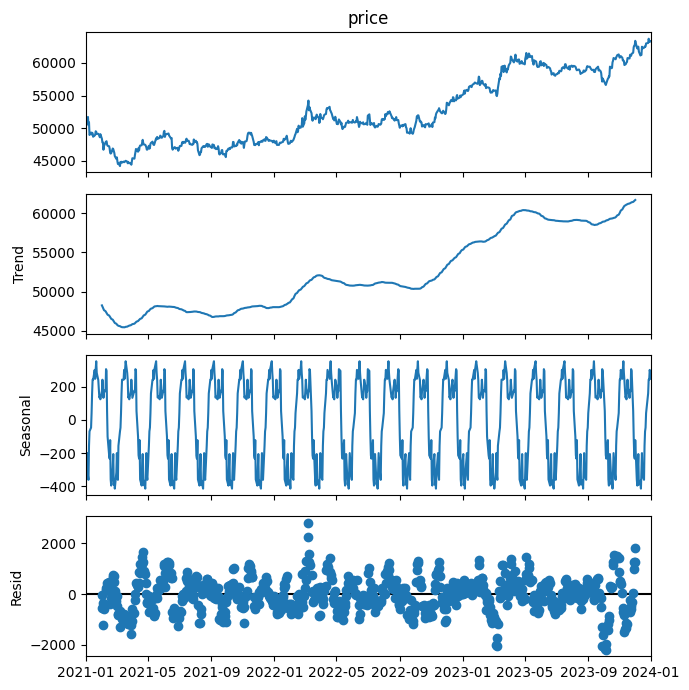

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib

df2=df1.sort_values(by='date', ascending=True)
matplotlib.rc('figure', figsize=(7, 7))
decompose = seasonal_decompose(df2.price, period=40, model='additive')
decompose.plot()
plt.show()

Trend: The long-term pattern of the data, or its general behavior
Season: Variations related to calendar events
Error: The difference between the original data and the combination of trend and seasonality 


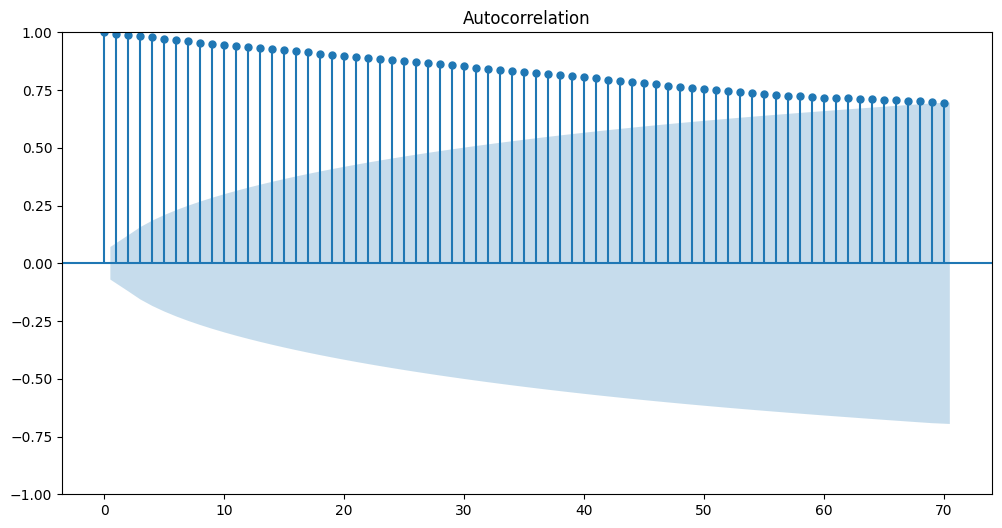

In [23]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,6))
    tsa_plots.plot_acf(df2.price,lags=70)
    plt.show()

#### To summarize, autocorrelation is the correlation between a time series (signal) and a delayed version of itself, while the ACF plots the correlation coefficient against the lag, and it’s a visual representation of autocorrelation

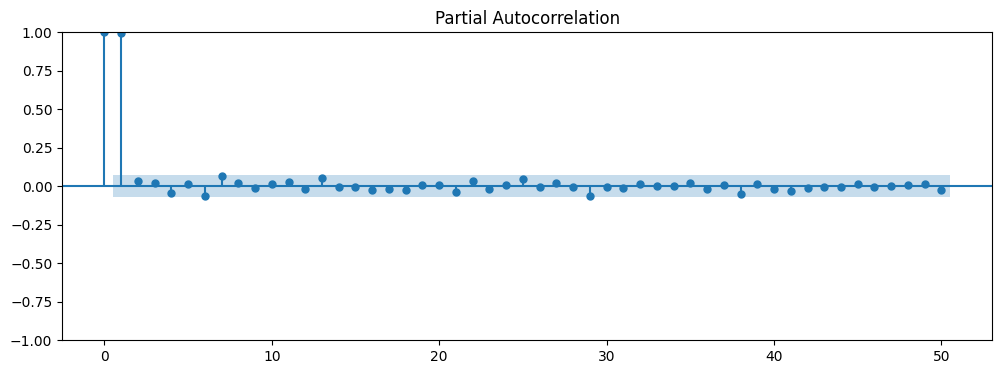

In [24]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_pacf(df2.price,lags=50)
    plt.show()

#### To summarize, a partial autocorrelation function captures a “direct” correlation between time series and a lagged version of itself.

In [25]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['price'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [26]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series.dropna())
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [27]:
adf_test(df2['price'])

Fail to reject the null hypothesis
Data is non-stationary


#### Augmented Dicky Fuller Test
Null Hypothesis (H0): The series is not stationary

p-val > 0.05

Alternate Hypothesis (H1): The series is stationary

p-val <= 0.05

## #Feature Scaling (Transformations)
#Square Root Transform

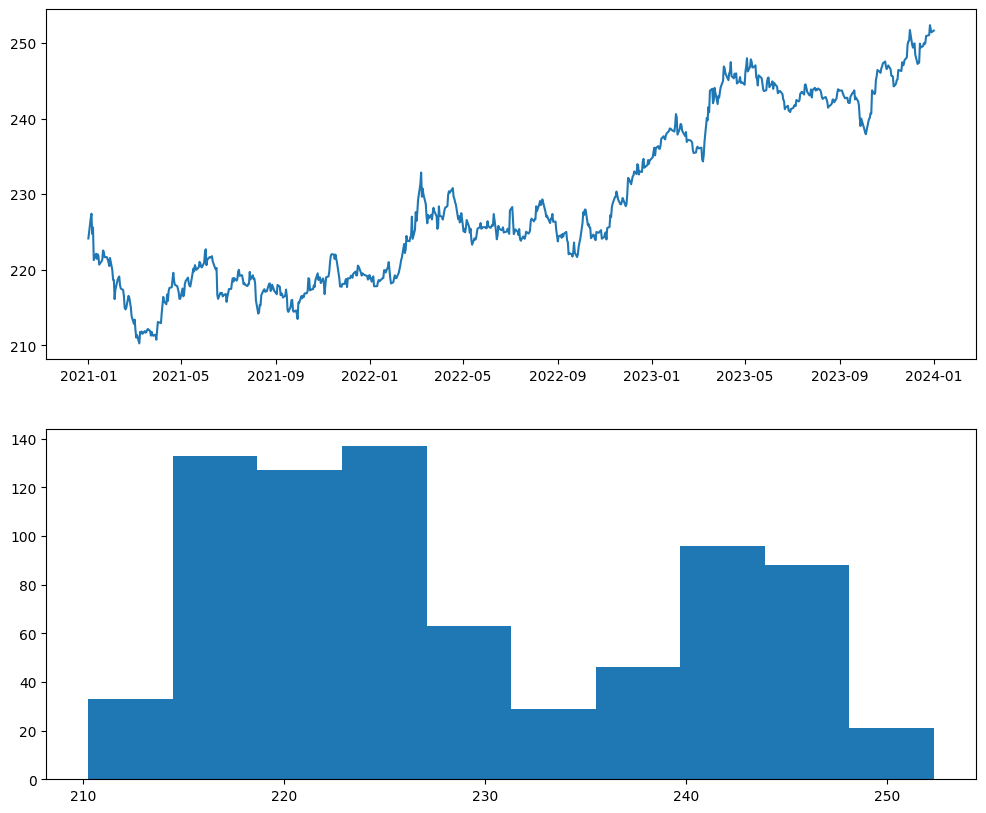

In [28]:
square_root= pd.DataFrame()
square_root = df2[['price']]
square_root['price'] = np.sqrt(square_root.price)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(square_root['price'])
#Histogram
plt.subplot(212)
plt.hist(square_root['price'])
plt.show()

In [29]:
adf_test(square_root)

Fail to reject the null hypothesis
Data is non-stationary


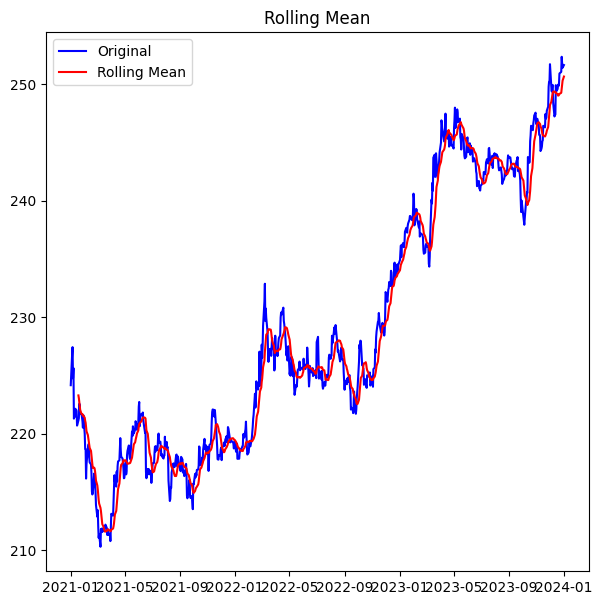

Results of Dickey Fuller Test:
Test Statistic                  -0.056560
p-value                          0.953597
#Lags Used                       7.000000
Number of Observations Used    765.000000
Critical Value (1%)             -3.438927
Critical Value (5%)             -2.865325
Critical Value (10%)            -2.568786
dtype: float64


In [30]:
test_stationarity(square_root)

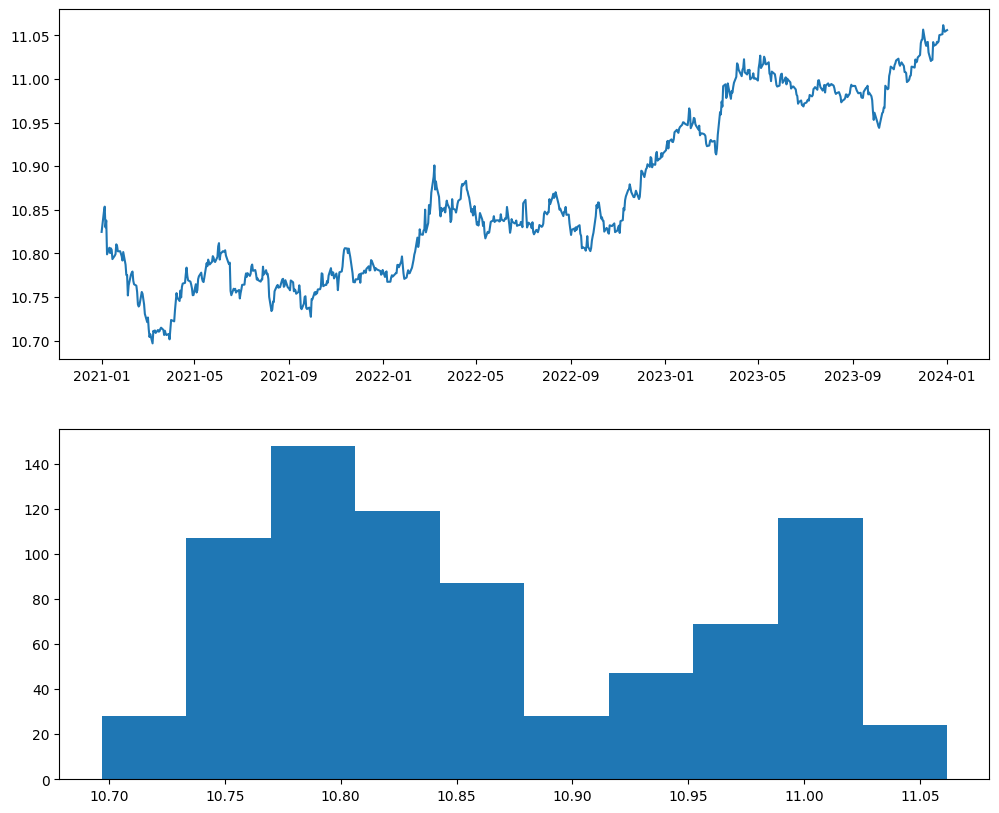

In [31]:
# Log Transform
log = pd.DataFrame()
log = df2[['price']]
log['price'] = np.log(log.price)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(log['price'])
#Histogram
plt.subplot(212)
plt.hist(log['price'])
plt.show()

In [32]:
adf_test(log)

Fail to reject the null hypothesis
Data is non-stationary


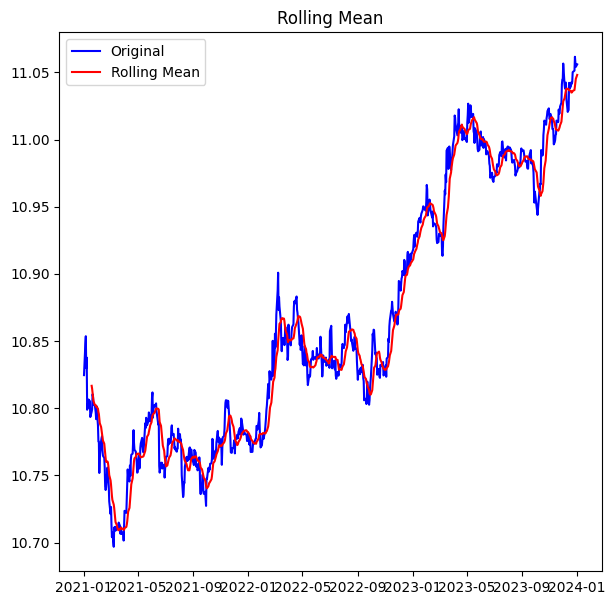

Results of Dickey Fuller Test:
Test Statistic                  -0.118131
p-value                          0.947602
#Lags Used                       7.000000
Number of Observations Used    765.000000
Critical Value (1%)             -3.438927
Critical Value (5%)             -2.865325
Critical Value (10%)            -2.568786
dtype: float64


In [33]:
test_stationarity(log)

In [34]:
df2=df2.drop(['month'],axis=1)

# Converting Non-Stationary Time Series into Stationary

Differencing

                price
date                 
2021-01-01  10.824646
2021-01-04  10.847860
2021-01-05  10.853600
2021-01-06  10.829907
2021-01-07  10.837697
...               ...
2023-12-26  11.051287
2023-12-27  11.061594
2023-12-28  11.057046
2023-12-29  11.054107
2024-01-01  11.055957

[773 rows x 1 columns]


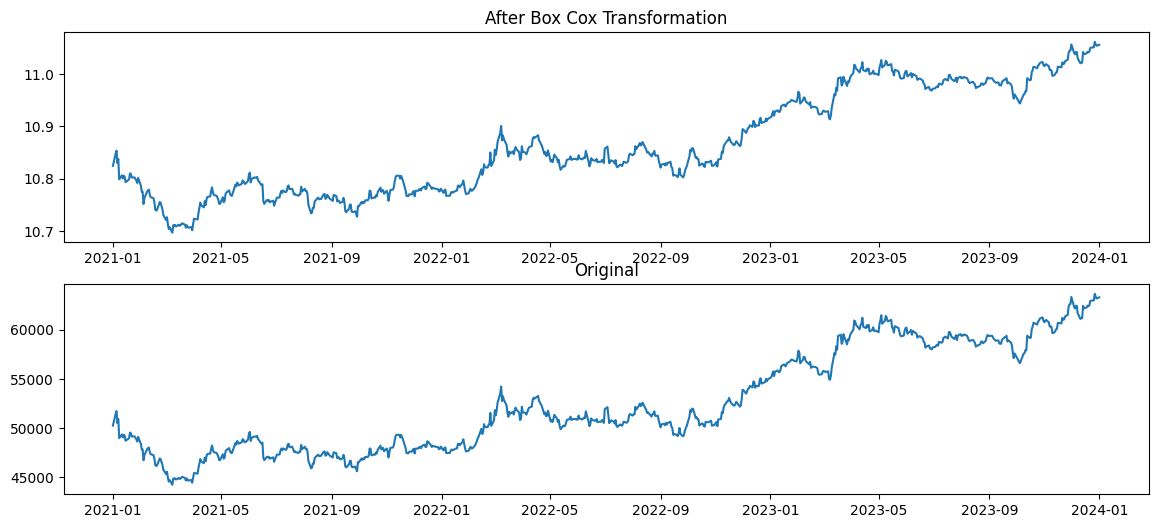

In [35]:
from scipy.stats import boxcox
data_boxcox = pd.DataFrame()
data_boxcox['price'] = pd.Series(boxcox(df2['price'], lmbda=0), df2.index)
print(data_boxcox)
fig, axis = plt.subplots(2,figsize=(14,6),)
axis[0].plot(data_boxcox)
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(df2['price'], label='original')
axis[1].set_title('Original')
plt.show()

#### Observation
1. We can see the variance became almost constant after the transformation. Both in the earlier and later years the variance is almost similar.
2. But we can see that still the series has an upward trend. So, the mean is not constant yet. Hence, we need to do `Differencing` for making the mean constant.

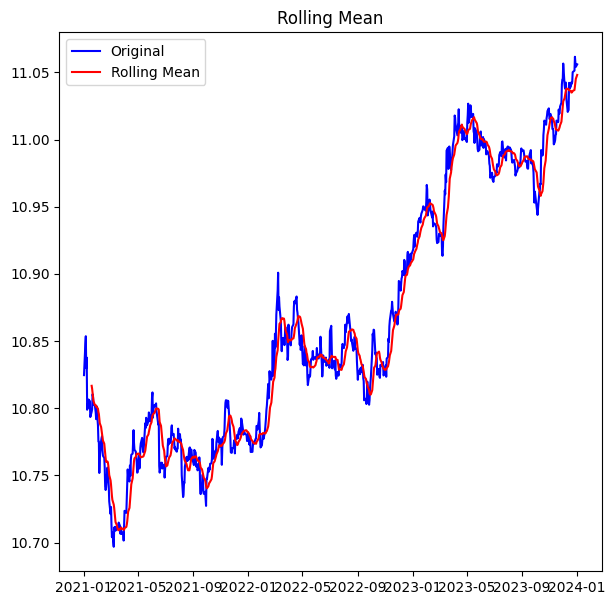

Results of Dickey Fuller Test:
Test Statistic                  -0.118131
p-value                          0.947602
#Lags Used                       7.000000
Number of Observations Used    765.000000
Critical Value (1%)             -3.438927
Critical Value (5%)             -2.865325
Critical Value (10%)            -2.568786
dtype: float64


In [36]:
test_stationarity(data_boxcox)

In [37]:
adf_test(data_boxcox)

Fail to reject the null hypothesis
Data is non-stationary


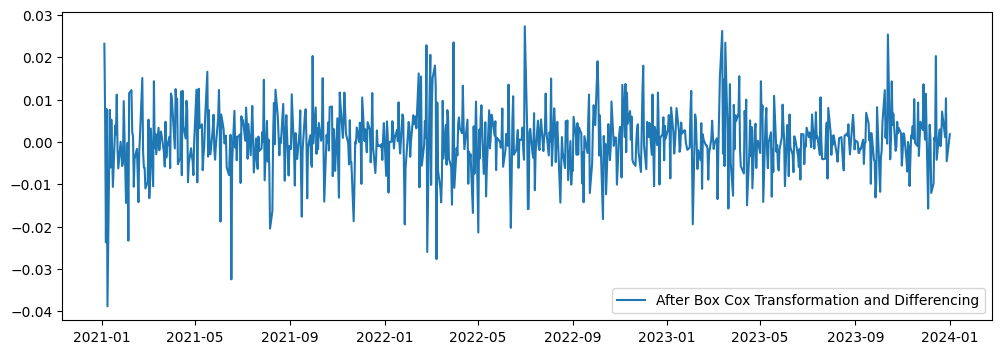

In [38]:
data_boxcox_diff = data_boxcox - data_boxcox.shift()
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()

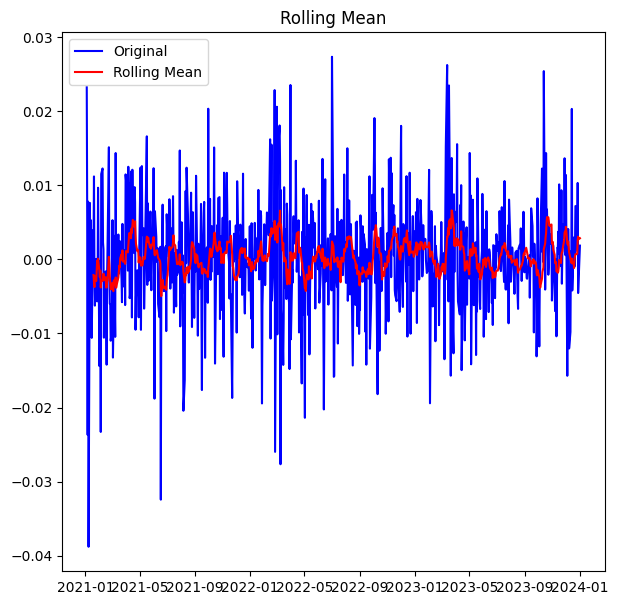

Results of Dickey Fuller Test:
Test Statistic                -1.113119e+01
p-value                        3.279108e-20
#Lags Used                     6.000000e+00
Number of Observations Used    7.650000e+02
Critical Value (1%)           -3.438927e+00
Critical Value (5%)           -2.865325e+00
Critical Value (10%)          -2.568786e+00
dtype: float64


In [39]:
#check this log transfered data with function
test_stationarity(data_boxcox_diff)

In [40]:
adf_test(data_boxcox_diff)

Reject the null hypothesis
Data is stationary


We are Successfully to convert data into stationary 

In [41]:
df1

,price,day,month,year,weekday
date,,,,,
2021-01-01,50244,1,Jan,2021,4
2021-01-04,51424,4,Jan,2021,7
2021-01-05,51720,5,Jan,2021,1
2021-01-06,50509,6,Jan,2021,2
2021-01-07,50904,7,Jan,2021,3
...,...,...,...,...,...
2023-12-26,63025,26,Dec,2023,1
2023-12-27,63678,27,Dec,2023,2
2023-12-28,63389,28,Dec,2023,3


In [42]:

ds = df1.copy()
ds.reset_index(inplace=True)
ds['t'] = np.arange(1,len(ds)+1)
ds['t_squared'] = np.square(ds.t)
months = pd.get_dummies(ds['month'],dtype=int)
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
ds = pd.concat([ds,months,],axis=1)
ds['log_price'] = np.log(ds['price'])
ds

,date,price,day,month,year,weekday,t,t_squared,Jan,Feb,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_price
0,2021-01-01,50244,1,Jan,2021,4,1,1,1,0,...,0,0,0,0,0,0,0,0,0,10.824646
1,2021-01-04,51424,4,Jan,2021,7,2,4,1,0,...,0,0,0,0,0,0,0,0,0,10.847860
2,2021-01-05,51720,5,Jan,2021,1,3,9,1,0,...,0,0,0,0,0,0,0,0,0,10.853600
3,2021-01-06,50509,6,Jan,2021,2,4,16,1,0,...,0,0,0,0,0,0,0,0,0,10.829907
4,2021-01-07,50904,7,Jan,2021,3,5,25,1,0,...,0,0,0,0,0,0,0,0,0,10.837697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,2023-12-26,63025,26,Dec,2023,1,769,591361,0,0,...,0,0,0,0,0,0,0,0,1,11.051287
769,2023-12-27,63678,27,Dec,2023,2,770,592900,0,0,...,0,0,0,0,0,0,0,0,1,11.061594
770,2023-12-28,63389,28,Dec,2023,3,771,594441,0,0,...,0,0,0,0,0,0,0,0,1,11.057046
771,2023-12-29,63203,29,Dec,2023,4,772,595984,0,0,...,0,0,0,0,0,0,0,0,1,11.054107


In [43]:
size=len(ds)
print(size)
train_data = ds.iloc[:size]                     
test_data = ds.iloc[size-30:]

773


In [44]:
test_data.head()

,date,price,day,month,year,weekday,t,t_squared,Jan,Feb,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_price
743,2023-11-20,60657,20,Nov,2023,7,744,553536,0,0,...,0,0,0,0,0,0,0,1,0,11.012990
744,2023-11-21,61225,21,Nov,2023,1,745,555025,0,0,...,0,0,0,0,0,0,0,1,0,11.022311
745,2023-11-22,61024,22,Nov,2023,2,746,556516,0,0,...,0,0,0,0,0,0,0,1,0,11.019023
746,2023-11-23,61072,23,Nov,2023,3,747,558009,0,0,...,0,0,0,0,0,0,0,1,0,11.019809
747,2023-11-24,61364,24,Nov,2023,4,748,559504,0,0,...,0,0,0,0,0,0,0,1,0,11.024579


In [45]:
train_data.head()

,date,price,day,month,year,weekday,t,t_squared,Jan,Feb,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_price
0,2021-01-01,50244,1,Jan,2021,4,1,1,1,0,...,0,0,0,0,0,0,0,0,0,10.824646
1,2021-01-04,51424,4,Jan,2021,7,2,4,1,0,...,0,0,0,0,0,0,0,0,0,10.847860
2,2021-01-05,51720,5,Jan,2021,1,3,9,1,0,...,0,0,0,0,0,0,0,0,0,10.853600
3,2021-01-06,50509,6,Jan,2021,2,4,16,1,0,...,0,0,0,0,0,0,0,0,0,10.829907
4,2021-01-07,50904,7,Jan,2021,3,5,25,1,0,...,0,0,0,0,0,0,0,0,0,10.837697


### Building Ordinary Square Model (Linear Model)

In [46]:
#Linear Model
import statsmodels.formula.api as smf  # type: ignore

linear_model = smf.ols('price~t',data=train_data).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test_data['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test_data['price'])-np.array(pred_linear))**2))
rmse_linear

1882.593030675981

In [47]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     4474.
Date:                Tue, 21 May 2024   Prob (F-statistic):          2.96e-323
Time:                        13:03:33   Log-Likelihood:                -6963.0
No. Observations:                 773   AIC:                         1.393e+04
Df Residuals:                     771   BIC:                         1.394e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.429e+04    142.469    310.857      0.000     4.4e+04    4.46e+04
t             21.3320      0.319     66.888      0.000      20.706      21.958
==============================================================================
Omnibus:                       16.495   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.962
Skew:                           0.348   Prob(JB):                     0.000207
Kurtosis:                       3.207   Cond. No.                         894.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#Exponential

Exp = smf.ols('log_price~t',data=train_data).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test_data['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test_data['price'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

1665.2042870361665

In [49]:
Exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     4711.
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        13:03:33   Log-Likelihood:                 1468.4
No. Observations:                 773   AIC:                            -2933.
Df Residuals:                     771   BIC:                            -2923.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.7095      0.003   4102.694      0.000      10.704      10.715
t              0.0004   5.84e-06     68.634      0.000       0.000       0.000
==============================================================================
Omnibus:                       25.525   Durbin-Watson:                   0.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.874
Skew:                           0.414   Prob(JB):                     8.85e-07
Kurtosis:                       3.423   Cond. No.                         894.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#Quadratic 

Quad = smf.ols('price~t+t_squared',data=train_data).fit()
pred_Quad = pd.Series(Quad.predict(test_data[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test_data['price'])-np.array(pred_Quad))**2))
rmse_Quad

760.8416888111664

In [51]:
Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     3392.
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        13:03:34   Log-Likelihood:                -6821.5
No. Observations:                 773   AIC:                         1.365e+04
Df Residuals:                     770   BIC:                         1.366e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.674e+04    178.359    262.076      0.000    4.64e+04    4.71e+04
t              2.3173      1.064      2.177      0.030       0.228       4.406
t_squared      0.0246      0.001     18.451      0.000       0.022       0.027
==============================================================================
Omnibus:                       24.947   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.601
Skew:                           0.451   Prob(JB):                     1.67e-06
Kurtosis:                       3.105   Cond. No.                     8.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
#Additive seasonality 

add_sea = smf.ols('price~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea = pd.Series(add_sea.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test_data['price'])-np.array(pred_add_sea))**2))
rmse_add_sea

7996.179888002195

In [53]:
add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.689
Date:                Tue, 21 May 2024   Prob (F-statistic):            0.00212
Time:                        13:03:35   Log-Likelihood:                -7689.3
No. Observations:                 773   AIC:                         1.540e+04
Df Residuals:                     761   BIC:                         1.546e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.849e+04    169.347    286.342      0.000    4.82e+04    4.88e+04
Jan         3022.3367    618.990      4.883      0.000    1807.205    4237.468
Feb         2496.3997    628.462      3.972      0.000    1262.674    3730.125
Mar         3011.4279    589.227      5.111      0.000    1854.725    4168.131
Apr         4395.7497    628.462      6.994      0.000    3162.024    5629.475
May         4743.8890    601.387      7.888      0.000    3563.315    5924.463
Jun         4154.3284    601.387      6.908      0.000    2973.754    5334.902
Jul         3969.3559    609.977      6.507      0.000    2771.919    5166.793
Aug         4095.8133    601.387      6.811      0.000    2915.239    5276.387
Sep         3160.0266    605.631      5.218      0.000    1971.121    4348.932
Oct         3987.8227    614.429      6.490      0.000    2781.646    5193.999
Nov         5308.4123    597.240      8.888      0.000    4135.978    6480.847
Dec         6145.4881    605.631     10.147      0.000    4956.582    7334.394
==============================================================================
Omnibus:                     2975.485   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.834
Skew:                           0.387   Prob(JB):                     2.07e-17
Kurtosis:                       1.663   Cond. No.                     1.67e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.02e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [54]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('price~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test_data['price'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

749.0651960240592

In [55]:
add_sea_Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1001.
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        13:03:35   Log-Likelihood:                -6583.9
No. Observations:                 773   AIC:                         1.320e+04
Df Residuals:                     759   BIC:                         1.326e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.268e+04    124.662    342.393      0.000    4.24e+04    4.29e+04
t              3.7068      0.796      4.657      0.000       2.144       5.269
t_squared      0.0245      0.001     24.661      0.000       0.023       0.026
Jan         4676.2037    149.143     31.354      0.000    4383.422    4968.985
Feb         4096.7800    151.266     27.083      0.000    3799.830    4393.730
Mar         4216.4498    141.677     29.761      0.000    3938.325    4494.574
Apr         5359.0695    151.012     35.488      0.000    5062.618    5655.521
May         4941.7142    144.635     34.167      0.000    4657.781    5225.647
Jun         4038.4957    144.713     27.907      0.000    3754.411    4322.580
Jul         3451.0998    146.896     23.494      0.000    3162.730    3739.470
Aug         2982.4559    145.182     20.543      0.000    2697.450    3267.462
Sep         1617.6701    146.489     11.043      0.000    1330.098    1905.242
Oct         1789.5522    149.047     12.007      0.000    1496.960    2082.145
Nov         2413.6239    145.699     16.566      0.000    2127.602    2699.646
Dec         3100.3953    147.915     20.961      0.000    2810.025    3390.766
==============================================================================
Omnibus:                        0.443   Durbin-Watson:                   0.128
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.347
Skew:                           0.045   Prob(JB):                        0.841
Kurtosis:                       3.053   Cond. No.                     1.66e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.01e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [56]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_price~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test_data))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test_data['price'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

8282.193513146525

In [57]:
Mul_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.615
Date:                Tue, 21 May 2024   Prob (F-statistic):            0.00281
Time:                        13:03:35   Log-Likelihood:                 724.63
No. Observations:                 773   AIC:                            -1425.
Df Residuals:                     761   BIC:                            -1369.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0288      0.003   3160.005      0.000      10.023      10.035
Jan            0.8180      0.012     70.516      0.000       0.795       0.841
Feb            0.8074      0.012     68.556      0.000       0.784       0.831
Mar            0.8151      0.011     73.819      0.000       0.793       0.837
Apr            0.8417      0.012     71.469      0.000       0.819       0.865
May            0.8488      0.011     75.310      0.000       0.827       0.871
Jun            0.8386      0.011     74.408      0.000       0.816       0.861
Jul            0.8350      0.011     73.042      0.000       0.813       0.857
Aug            0.8371      0.011     74.279      0.000       0.815       0.859
Sep            0.8187      0.011     72.136      0.000       0.796       0.841
Oct            0.8349      0.012     72.505      0.000       0.812       0.857
Nov            0.8593      0.011     76.777      0.000       0.837       0.881
Dec            0.8740      0.011     77.008      0.000       0.852       0.896
==============================================================================
Omnibus:                     8634.709   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.823
Skew:                           0.317   Prob(JB):                     1.54e-16
Kurtosis:                       1.636   Cond. No.                     1.67e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.02e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_price~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test_data))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test_data['price'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

1690.4769042728956

In [59]:
Mul_Add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     624.4
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        13:03:36   Log-Likelihood:                 1632.1
No. Observations:                 773   AIC:                            -3238.
Df Residuals:                     760   BIC:                            -3178.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.8769      0.002   4836.195      0.000       9.873       9.881
t              0.0004   5.03e-06     84.806      0.000       0.000       0.000
Jan            0.8499      0.004    235.553      0.000       0.843       0.857
Feb            0.8360      0.004    228.480      0.000       0.829       0.843
Mar            0.8346      0.003    243.761      0.000       0.828       0.841
Apr            0.8557      0.004    234.612      0.000       0.849       0.863
May            0.8467      0.003    242.855      0.000       0.840       0.854
Jun            0.8305      0.003    238.121      0.000       0.824       0.837
Jul            0.8194      0.004    231.389      0.000       0.812       0.826
Aug            0.8106      0.004    231.562      0.000       0.804       0.817
Sep            0.7846      0.004    221.993      0.000       0.778       0.791
Oct            0.7899      0.004    219.338      0.000       0.783       0.797
Nov            0.8035      0.004    227.974      0.000       0.797       0.810
Dec            0.8155      0.004    227.907      0.000       0.808       0.823
==============================================================================
Omnibus:                       20.508   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.572
Skew:                           0.274   Prob(JB):                     1.03e-06
Kurtosis:                       3.746   Cond. No.                     2.64e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.21e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [60]:
np.exp(pred_Mult_add_sea)

743    59729.510338
744    59754.981237
745    59780.462998
746    59805.955625
747    59831.459123
748    59856.973497
749    59882.498751
750    59908.034890
751    59933.581919
752    60683.936836
753    60709.814739
754    60735.703676
755    60761.603654
756    60787.514676
757    60813.436748
758    60839.369874
759    60865.314058
760    60891.269307
761    60917.235623
762    60943.213013
763    60969.201480
764    60995.201030
765    61021.211667
766    61047.233396
767    61073.266221
768    61099.310148
769    61125.365181
770    61151.431325
771    61177.508584
772    63347.424413
dtype: float64

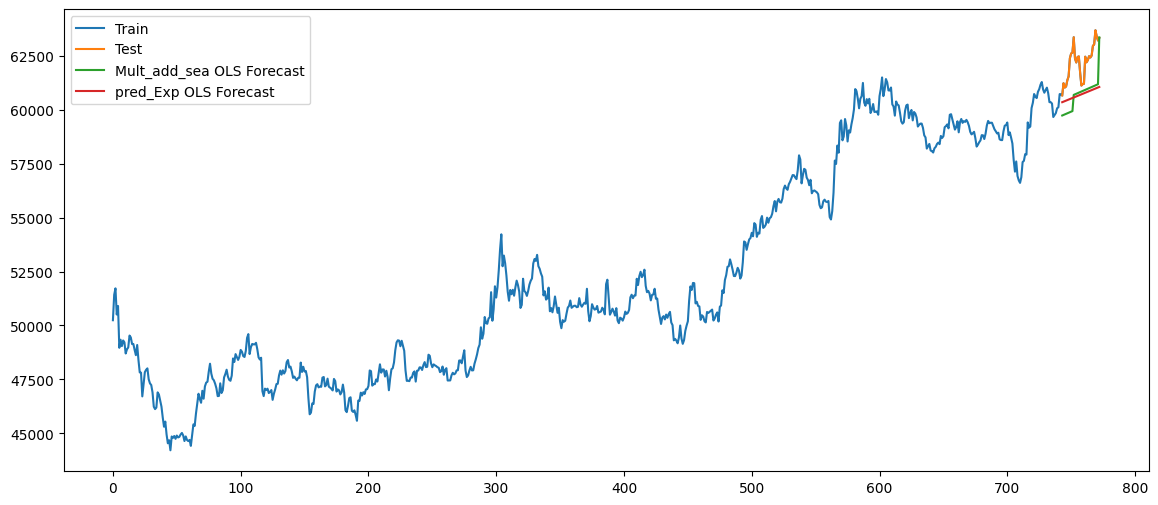

In [61]:
plt.figure(figsize=(14,6))
plt.plot(train_data['price'], label='Train')
plt.plot(test_data['price'], label='Test')
plt.plot(np.exp(pred_Mult_add_sea), label='Mult_add_sea OLS Forecast')
plt.plot(np.exp(pred_Exp), label='pred_Exp OLS Forecast')
plt.legend(loc='best')
plt.show()

In [62]:
#Compare the results 

data = {"Models":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)
table_rmse.sort_values(['RMSE_Values'])

,Models,RMSE_Values
0,rmse_add_sea_quad,749.065196
1,rmse_Quad,760.841689
2,rmse_Exp,1665.204287
3,rmse_Mult_add_sea,1690.476904
4,rmse_linear,1882.593031
5,rmse_add_sea,7996.179888
6,rmse_Mult_sea,8282.193513


In our Case RMSE Exponential has less RMSE_VALUES that is 749.6



Build the model on entire data set

In [63]:
ds

,date,price,day,month,year,weekday,t,t_squared,Jan,Feb,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_price
0,2021-01-01,50244,1,Jan,2021,4,1,1,1,0,...,0,0,0,0,0,0,0,0,0,10.824646
1,2021-01-04,51424,4,Jan,2021,7,2,4,1,0,...,0,0,0,0,0,0,0,0,0,10.847860
2,2021-01-05,51720,5,Jan,2021,1,3,9,1,0,...,0,0,0,0,0,0,0,0,0,10.853600
3,2021-01-06,50509,6,Jan,2021,2,4,16,1,0,...,0,0,0,0,0,0,0,0,0,10.829907
4,2021-01-07,50904,7,Jan,2021,3,5,25,1,0,...,0,0,0,0,0,0,0,0,0,10.837697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,2023-12-26,63025,26,Dec,2023,1,769,591361,0,0,...,0,0,0,0,0,0,0,0,1,11.051287
769,2023-12-27,63678,27,Dec,2023,2,770,592900,0,0,...,0,0,0,0,0,0,0,0,1,11.061594
770,2023-12-28,63389,28,Dec,2023,3,771,594441,0,0,...,0,0,0,0,0,0,0,0,1,11.057046
771,2023-12-29,63203,29,Dec,2023,4,772,595984,0,0,...,0,0,0,0,0,0,0,0,1,11.054107


In [64]:
# Set the date column as the index

ds.set_index('date', inplace=True)
ds['time'] = np.arange(len(ds))

model building 

In [65]:
model_full = smf.ols('log_price~time',data=ds).fit()

In [66]:
import pickle
pickle.dump(model_full,open('deployment.pkl','wb'))

In [67]:
from datetime import timedelta

future_dates = [ds.index[-1] + timedelta(days=i) for i in range(1, 180)]
future_time = np.arange(len(ds), len(ds) + 179)
future_df = pd.DataFrame({'time': future_time}, index=future_dates)

In [68]:
pred_new_log  = pd.Series(model_full.predict(future_df))
pred_new_log

2024-01-02    11.019883
2024-01-03    11.020284
2024-01-04    11.020685
2024-01-05    11.021086
2024-01-06    11.021487
                ...    
2024-06-24    11.089666
2024-06-25    11.090067
2024-06-26    11.090468
2024-06-27    11.090869
2024-06-28    11.091270
Length: 179, dtype: float64

In [69]:
pred_new = np.exp(pred_new_log)
pred_new

2024-01-02    61076.544678
2024-01-03    61101.044355
2024-01-04    61125.553860
2024-01-05    61150.073196
2024-01-06    61174.602367
                  ...     
2024-06-24    65490.864185
2024-06-25    65517.134581
2024-06-26    65543.415515
2024-06-27    65569.706991
2024-06-28    65596.009013
Length: 179, dtype: float64

In [70]:
future_df['forecasted_price']=pred_new

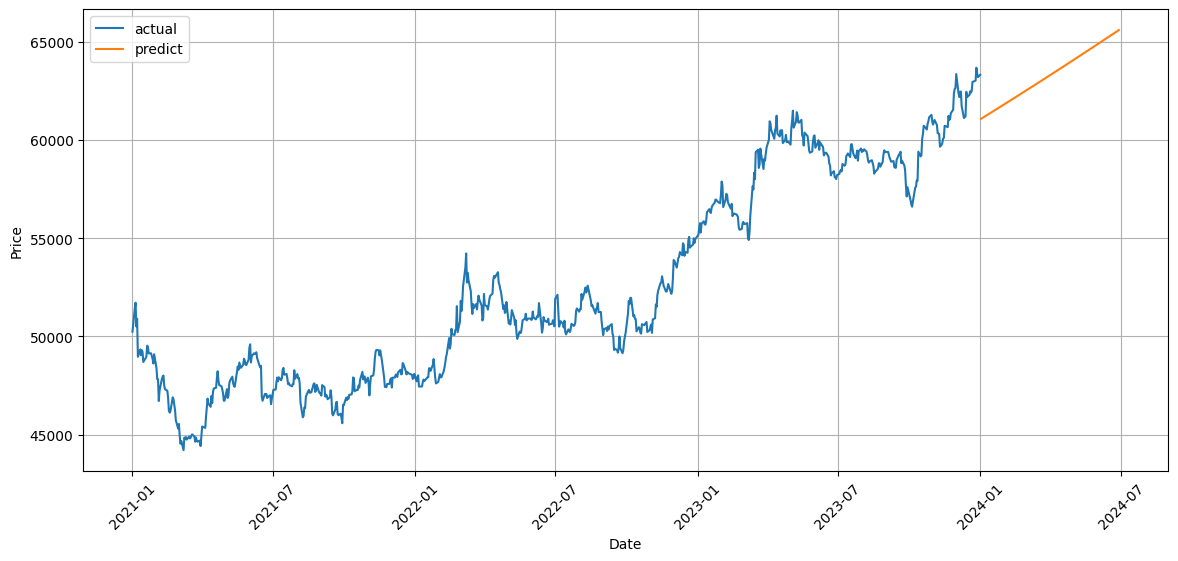

In [71]:
plt.figure(figsize=(14,6))

plt.plot(ds['price'], label='actual')
plt.plot(future_df['forecasted_price'], label='predict')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(True)
plt.show()